# Real Estate Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

We will dismiss some columns since they are not important for our prediction model.

In [3]:
df1.drop(["availability","society","area_type","balcony"], axis = "columns" , inplace = True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df1.shape

(13320, 5)

In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have a large amount of rows, we can delete the rows containing NaN values.

In [6]:
df1.dropna(inplace=True)

In [7]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


We observe that BHK is the same as bedroom. So we will create a new column called "bedrooms" and we will only store the numerical value

In [9]:
df1["bedrooms"] = df1["size"].apply(lambda x: int(x.split(' ')[0]))
df1.drop(["size"], axis = "columns", inplace = True)
df1.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [10]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
df1

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


Some values in the total_sqft column are ranges such as '1133 - 1384' and other contain strings, like 

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df2 = df1[df1["total_sqft"].apply(is_float)]  #
df2

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
df1.shape

(13246, 5)

We observe that our original dataset had 13246. However, when applying the is_float function in order to gather all the rows which value can be converted to a float, we obtain a new dataset with 13056 rows.
What we want to do is to get the supplementary dataset, in order to do that we can use ~ (fn + alt + 4)

In [15]:
df3 = df1[~df1["total_sqft"].apply(is_float)]  
df3.head(10)

,location,total_sqft,bath,price,bedrooms
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [16]:
df3.shape

(190, 5)

We now notice that the are some cases like "34.46Sq. Meter". Since cleaning it will be unnecessarly difficult, we will dismiss these values, but we will get the average value of the ranges.
Now we will create a new function called range_converter, that will gather the average values of the ranges and also dismiss other non-float values.

In [17]:
def float_converter(x):
    try: 
        float(x)
        return float(x)
    
    except:
        
        try:
            tokens = x.split('-')
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
        except:
            return None

In [18]:
df5 = df1.copy()
df5["total_sqft"] = df1["total_sqft"].apply(float_converter)
df5.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
df5.shape

(13246, 5)

In [20]:
# we compare line 122 with its associated row in df5, and the problem is solved.
df5.loc[(df5["location"] == "Hebbal") & (df5["price"] == 477.000)]

,location,total_sqft,bath,price,bedrooms
122,Hebbal,5611.5,4.0,477.0,4


## Feature Egineering

In [21]:
df5.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
df5["price_per_sqft"] = (df5["price"] * 100000) / df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Let's find out how many different locations are there and figure out an effective way to organize them all

In [23]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
len(df5.location.unique())

1304

In [32]:
#before grouping, let's strip the strings to avoid errors like extra spaces
df5["location"] = df5["location"].apply(lambda x: x.strip())

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats  

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

What we want to do is to substitute all the locations with less than 10 appearances and agroup them as "other"

In [35]:
less_than_10 = location_stats[location_stats < 10]
less_than_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [40]:
df5.location = df5.location.apply(lambda x: 'other' if x in less_than_10 else x)
len(df5.location.unique())

255

## Outlier Detection and Removal

Data outliers are data points wih¡ch are data error or just represent an extreme variation in a dataset. Although they are valid, it makes sense to remove them otherwise they can create some issues later on.

For example, we can assume that each bedroom is about 100sqft. Having this in mind, we can create a new column storing the sqft per bedroom and remove the ones that exceed this limit.

In [56]:
df5.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [57]:
df5[(df5.total_sqft / df5.bedrooms) < 300]  #there are 744 houses with unusual properties.

,location,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [59]:
#in order to remove them from our main dataset, we can use ~
df5 = df5[~((df5.total_sqft / df5.bedrooms) < 300)]
df5

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [61]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [73]:
df5.groupby("location").agg(["count","mean","std"])

total_sqft                            bath  \
                               count         mean          std count   
location                                                               
1st Block Jayanagar               10  1915.000000   667.549416    10   
1st Block Koramangala             10  1934.500000   793.068758    10   
1st Phase JP Nagar                23  1800.695652   800.365169    24   
2nd Phase Judicial Layout         11  1173.272727   341.193227    11   
2nd Stage Nagarbhavi               9  2127.777778  1013.382674     9   
...                              ...          ...          ...   ...   
Yelahanka                        205  1776.041463  2976.915456   205   
Yelahanka New Town                38  1215.526316   762.328252    39   
Yelenahalli                       13  1268.461538   190.068240    13   
Yeshwanthpur                      80  1454.343750   616.906316    80   
other                           2432  1735.201205  1799.693190  2451   

                                              price                          \
                               mean       std count        mean         std   
location                                                                      
1st Block Jayanagar        3.100000  0.875595    10  254.100000  147.006765   
1st Block Koramangala      3.300000  1.159502    10  283.450000  222.507484   
1st Phase JP Nagar         2.958333  1.334465    24  167.812500   94.458274   
2nd Phase Judicial Layout  2.090909  0.539360    11   46.181818   12.214792   
2nd Stage Nagarbhavi       4.666667  1.936492     9  270.111111  104.708458   
...                             ...       ...   ...         ...         ...   
Yelahanka                  2.458537  1.011933   205   84.137976   74.225933   
Yelahanka New Town         1.871795  0.731958    39   87.294872  147.131194   
Yelenahalli                2.153846  0.375534    13   50.799231    9.108173   
Yeshwanthpur               2.400000  0.962591    80   97.079313   52.131124   
other                      2.705834  1.291243  2451  143.333170  228.280966   

                          bedrooms                     price_per_sqft  \
                             count      mean       std          count   
location                                                                
1st Block Jayanagar             10  3.200000  0.788811             10   
1st Block Koramangala           10  3.200000  0.918937             10   
1st Phase JP Nagar              24  2.875000  1.115601             23   
2nd Phase Judicial Layout       11  2.454545  0.687552             11   
2nd Stage Nagarbhavi             9  4.555556  0.881917              9   
...                            ...       ...       ...            ...   
Yelahanka                      205  2.512195  0.905375            205   
Yelahanka New Town              39  2.076923  0.956546             38   
Yelenahalli                     13  2.230769  0.438529             13   
Yeshwanthpur                    80  2.437500  0.952595             80   
other                         2451  2.802938  1.211816           2432   

                                                      
                                   mean          std  
location                                              
1st Block Jayanagar        12359.253758  3931.939592  
1st Block Koramangala      13849.390916  9617.805384  
1st Phase JP Nagar          9726.405918  4802.127570  
2nd Phase Judicial Layout   4048.701183   674.730658  
2nd Stage Nagarbhavi       14381.275720  5272.435848  
...                                 ...          ...  
Yelahanka                   5204.894684  1746.405991  
Yelahanka New Town          5860.659870  3889.233175  
Yelenahalli                 4012.550871   533.259531  
Yeshwanthpur                6620.544179  2028.990461  
other                       7411.665756  6401.105087  

[255 rows x 15 columns]

In [65]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for location, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-s)) & (subdf.price_per_sqft <= (m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
        
    return df_out

In [66]:
df7 = remove_pps_outliers(df5)
df7

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10217,other,1353.0,2.0,110.00,2,8130.081301
10218,other,812.0,1.0,26.00,1,3201.970443
10219,other,1440.0,2.0,63.93,3,4439.583333
10220,other,1075.0,2.0,48.00,2,4465.116279


Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

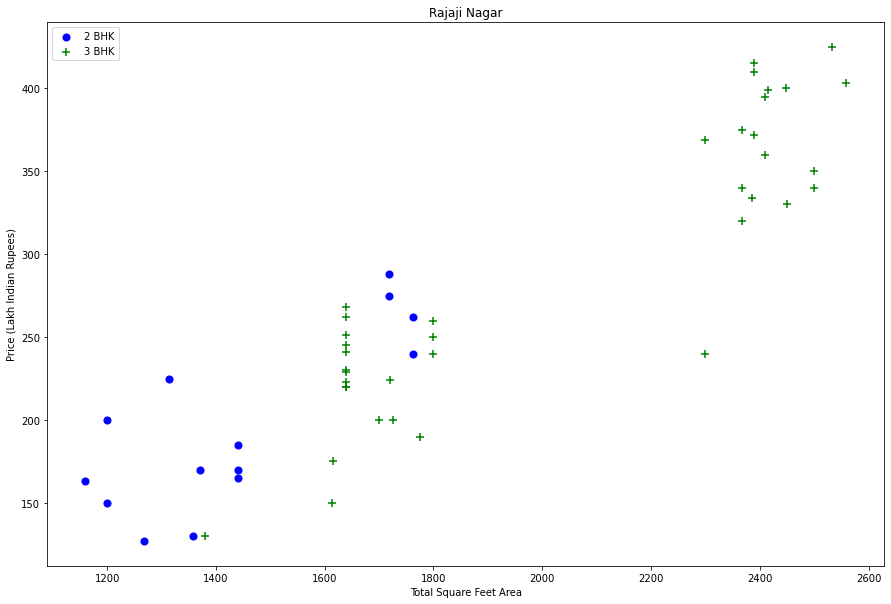

In [74]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

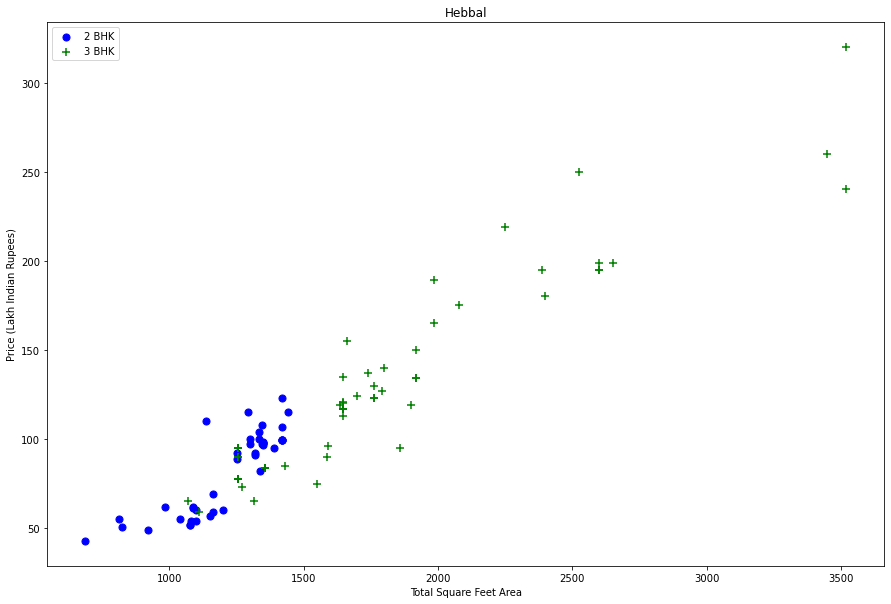

In [75]:
plot_scatter_chart(df7,"Hebbal")

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [77]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7369, 6)

Text(0, 0.5, 'Count')

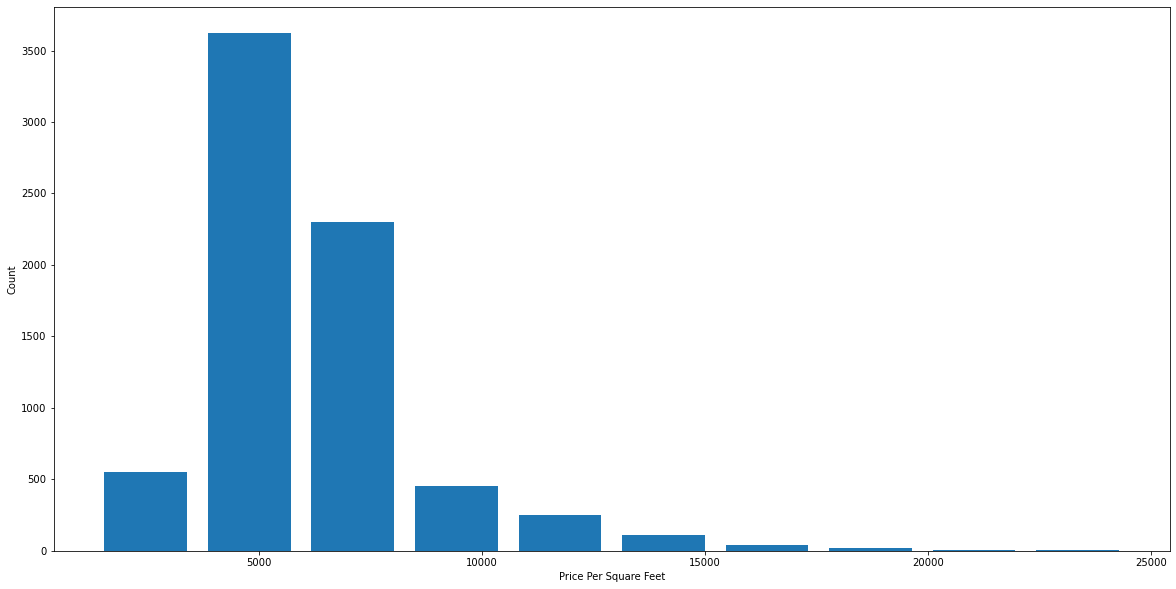

In [78]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

We are gonna remove outliers for the number of bathrooms. The criteria we are following is that a home can not have 2 more bathrooms than the number of bedrooms.

In [81]:
df8[df8.bath >= df8.bedrooms + 2]

,location,total_sqft,bath,price,bedrooms,price_per_sqft
41,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
42,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
535,Arekere,2710.0,6.0,142.0,4,5239.852399
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
588,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
...,...,...,...,...,...,...
9707,other,1200.0,4.0,138.0,2,11500.000000
9905,other,6652.0,6.0,510.0,4,7666.867108
10021,other,600.0,4.0,70.0,2,11666.666667
10184,other,6652.0,6.0,660.0,4,9921.828022


In [93]:
df9 = df8[df8.bath < df8.bedrooms + 2]
df9.shape

(7291, 6)

## Machine Learning Model Building

First we need to drop some unnecessary columns

In [94]:
df9.drop(["price_per_sqft"], axis = "columns", inplace = True)

C:\Users\Ismam\AppData\Local\Temp\ipykernel_20384\1337482628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop(["price_per_sqft"], axis = "columns", inplace = True)


In [95]:
df9.head()

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Since machine learning models can not interpret text columns, we have to convert the location column into a numerical column.
One way to do this is with the get_dummies function in Pandas

In [98]:
dummies = pd.get_dummies(df9.location)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
df10 = pd.concat([df9, dummies.drop(["other"], axis = "columns")], axis = "columns")
df10

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df10.drop("location", axis = "columns", inplace = True)
df10

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Variable assignment

In [105]:
X = df10.drop(["price"], axis = "columns")  # X are the independent values
X.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y = df10.price  # Y is the column than we want to predict, and depends on the other ones.
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [111]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.855666245016118

In [112]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

CV = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv = CV)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
      }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=CV, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853445,{}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.733838,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Test the model for few properties

In [131]:
X.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [133]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Ismam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.10543612182431

In [134]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Ismam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.39878275569414

In [135]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Ismam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.16322432857777

In [136]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Ismam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.45657096244759

## Export the tested model to a pickle file

In [137]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [138]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))